In [1]:
library(ggplot2)
library(gridExtra)
library(repr)

In [2]:
test_df <- data.frame(
    x = c(1, 2, 3, 4, 5),
    y1 = c(1, 10, 100, 1000, 10000),
    y2 = c(1, 10, 100, 1000, 11111.11111),
    y3 = c(1, 10, 100, 1111.1111, 11111.11111),
    y4 = c(1, 10, 111.111, 1111.1111, 11111.11111),
    y5 = c(1, 11.11, 111.111, 1111.1111, 11111.11111)
)
test_df

x,y1,y2,y3,y4,y5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1.00,1.000,1.000,1.000
2,10,10.00,10.000,10.000,11.110
3,100,100.00,100.000,111.111,111.111
4,1000,1000.00,1111.111,1111.111,1111.111
5,10000,11111.11,11111.111,11111.111,11111.111


In [3]:
small_df <- data.frame(x = c(0, 1), y = c(1.5, 2.5))
small_df

x,y
<dbl>,<dbl>
0,1.5
1,2.5


In [4]:
get_data <- function (n) {
    x <- seq(-n, n)
    exp10 <- 10^x
    exp2 <- 2^x
    data.frame(x = x, exp10 = exp10, exp2 = exp2)
}

In [5]:
df <- get_data(10)
tail(df)

,x,exp10,exp2
,<int>,<dbl>,<dbl>
16,5,1e+05,32
17,6,1e+06,64
18,7,1e+07,128
19,8,1e+08,256
20,9,1e+09,512
21,10,1e+10,1024


In [16]:
options(warn=-1, repr.plot.width = 18, repr.plot.height = 6)

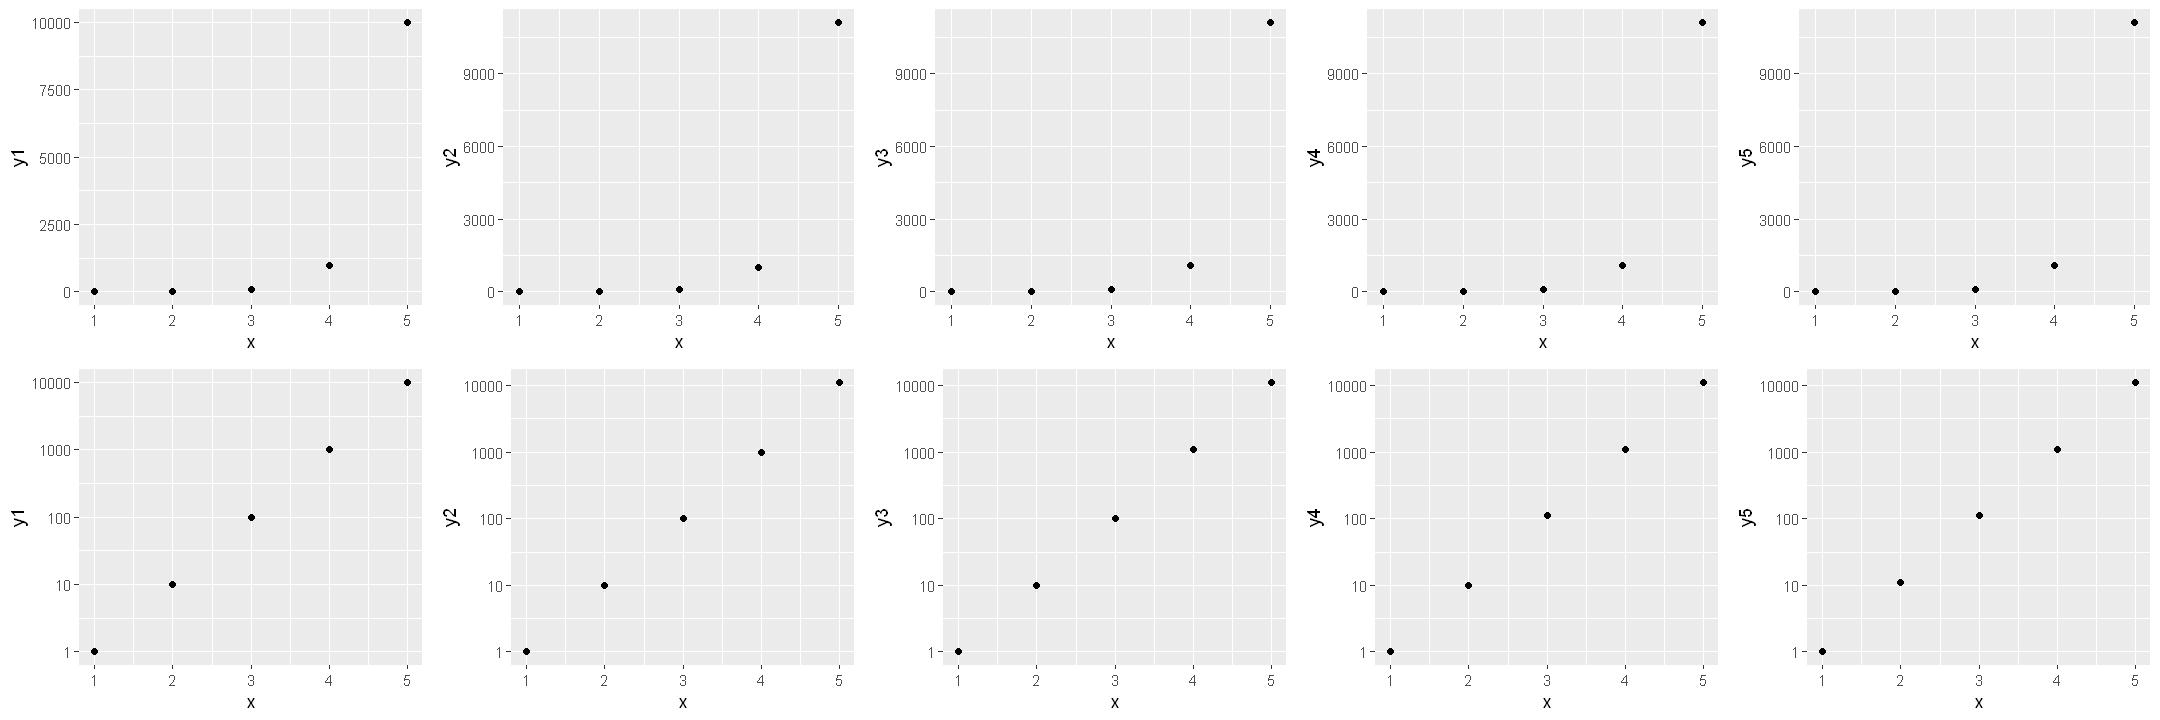

In [17]:
grid.arrange(
    ggplot(test_df, aes(x, y1)) + geom_point() + scale_y_continuous(),
    ggplot(test_df, aes(x, y2)) + geom_point() + scale_y_continuous(),
    ggplot(test_df, aes(x, y3)) + geom_point() + scale_y_continuous(),
    ggplot(test_df, aes(x, y4)) + geom_point() + scale_y_continuous(),
    ggplot(test_df, aes(x, y5)) + geom_point() + scale_y_continuous(),
    ggplot(test_df, aes(x, y1)) + geom_point() + scale_y_continuous(trans = 'log10'),
    ggplot(test_df, aes(x, y2)) + geom_point() + scale_y_continuous(trans = 'log10'),
    ggplot(test_df, aes(x, y3)) + geom_point() + scale_y_continuous(trans = 'log10'),
    ggplot(test_df, aes(x, y4)) + geom_point() + scale_y_continuous(trans = 'log10'),
    ggplot(test_df, aes(x, y5)) + geom_point() + scale_y_continuous(trans = 'log10'),
ncol = 5)

In [8]:
options(warn=-1, repr.plot.width = 18, repr.plot.height = 24)

In [9]:
get_plots <- function (data, xcol, ycol, trans, n1 = 9, n2 = 5) {
    grid.arrange(
        ggplot(data, aes(get(xcol), get(ycol))) + geom_point() + labs(x = xcol, y = ycol) + ggtitle("Default"),
        ggplot(data, aes(get(xcol), get(ycol))) + geom_point() + scale_y_continuous(trans = trans) + labs(x = xcol, y = ycol) + ggtitle(sprintf("continuous, %s", trans)),
        ggplot(data, aes(get(xcol), get(ycol))) + geom_point() + scale_y_continuous(trans = trans, n.breaks = n1) + labs(x = xcol, y = ycol) + ggtitle(sprintf("continuous, %s, n = %d", trans, n1)),
        ggplot(data, aes(get(xcol), get(ycol))) + geom_point() + scale_y_binned() + labs(x = xcol, y = ycol) + ggtitle("binned"),
        ggplot(data, aes(get(xcol), get(ycol))) + geom_point() + scale_y_binned(n.breaks = n2) + labs(x = xcol, y = ycol) + ggtitle(sprintf("binned, n = %d", n2)),
        ggplot(data, aes(get(xcol), get(ycol))) + geom_point() + scale_y_binned(nice.breaks = FALSE) + labs(x = xcol, y = ycol) + ggtitle("binned, nice = FALSE"),
        ggplot(data, aes(get(xcol), get(ycol))) + geom_point() + scale_y_binned(n.breaks = n2, nice.breaks = FALSE) + labs(x = xcol, y = ycol) + ggtitle(sprintf("binned, n = %d, nice = FALSE", n2)),
        ggplot(data, aes(get(xcol), get(ycol))) + geom_point() + scale_y_binned(trans = trans) + labs(x = xcol, y = ycol) + ggtitle(sprintf("binned, %s", trans)),
        ggplot(data, aes(get(xcol), get(ycol))) + geom_point() + scale_y_binned(trans = trans, n.breaks = n2) + labs(x = xcol, y = ycol) + ggtitle(sprintf("binned, %s, n = %d", trans, n2)),
        ggplot(data, aes(get(xcol), get(ycol))) + geom_point() + scale_y_binned(trans = trans, nice.breaks = FALSE) + labs(x = xcol, y = ycol) + ggtitle(sprintf("binned, %s, nice = FALSE", trans)),
        ggplot(data, aes(get(xcol), get(ycol))) + geom_point() + scale_y_binned(trans = trans, n.breaks = n2, nice.breaks = FALSE) + labs(x = xcol, y = ycol) + ggtitle(sprintf("binned, %s, n = %d, nice = FALSE", trans, n2)),
    ncol = 3)
}

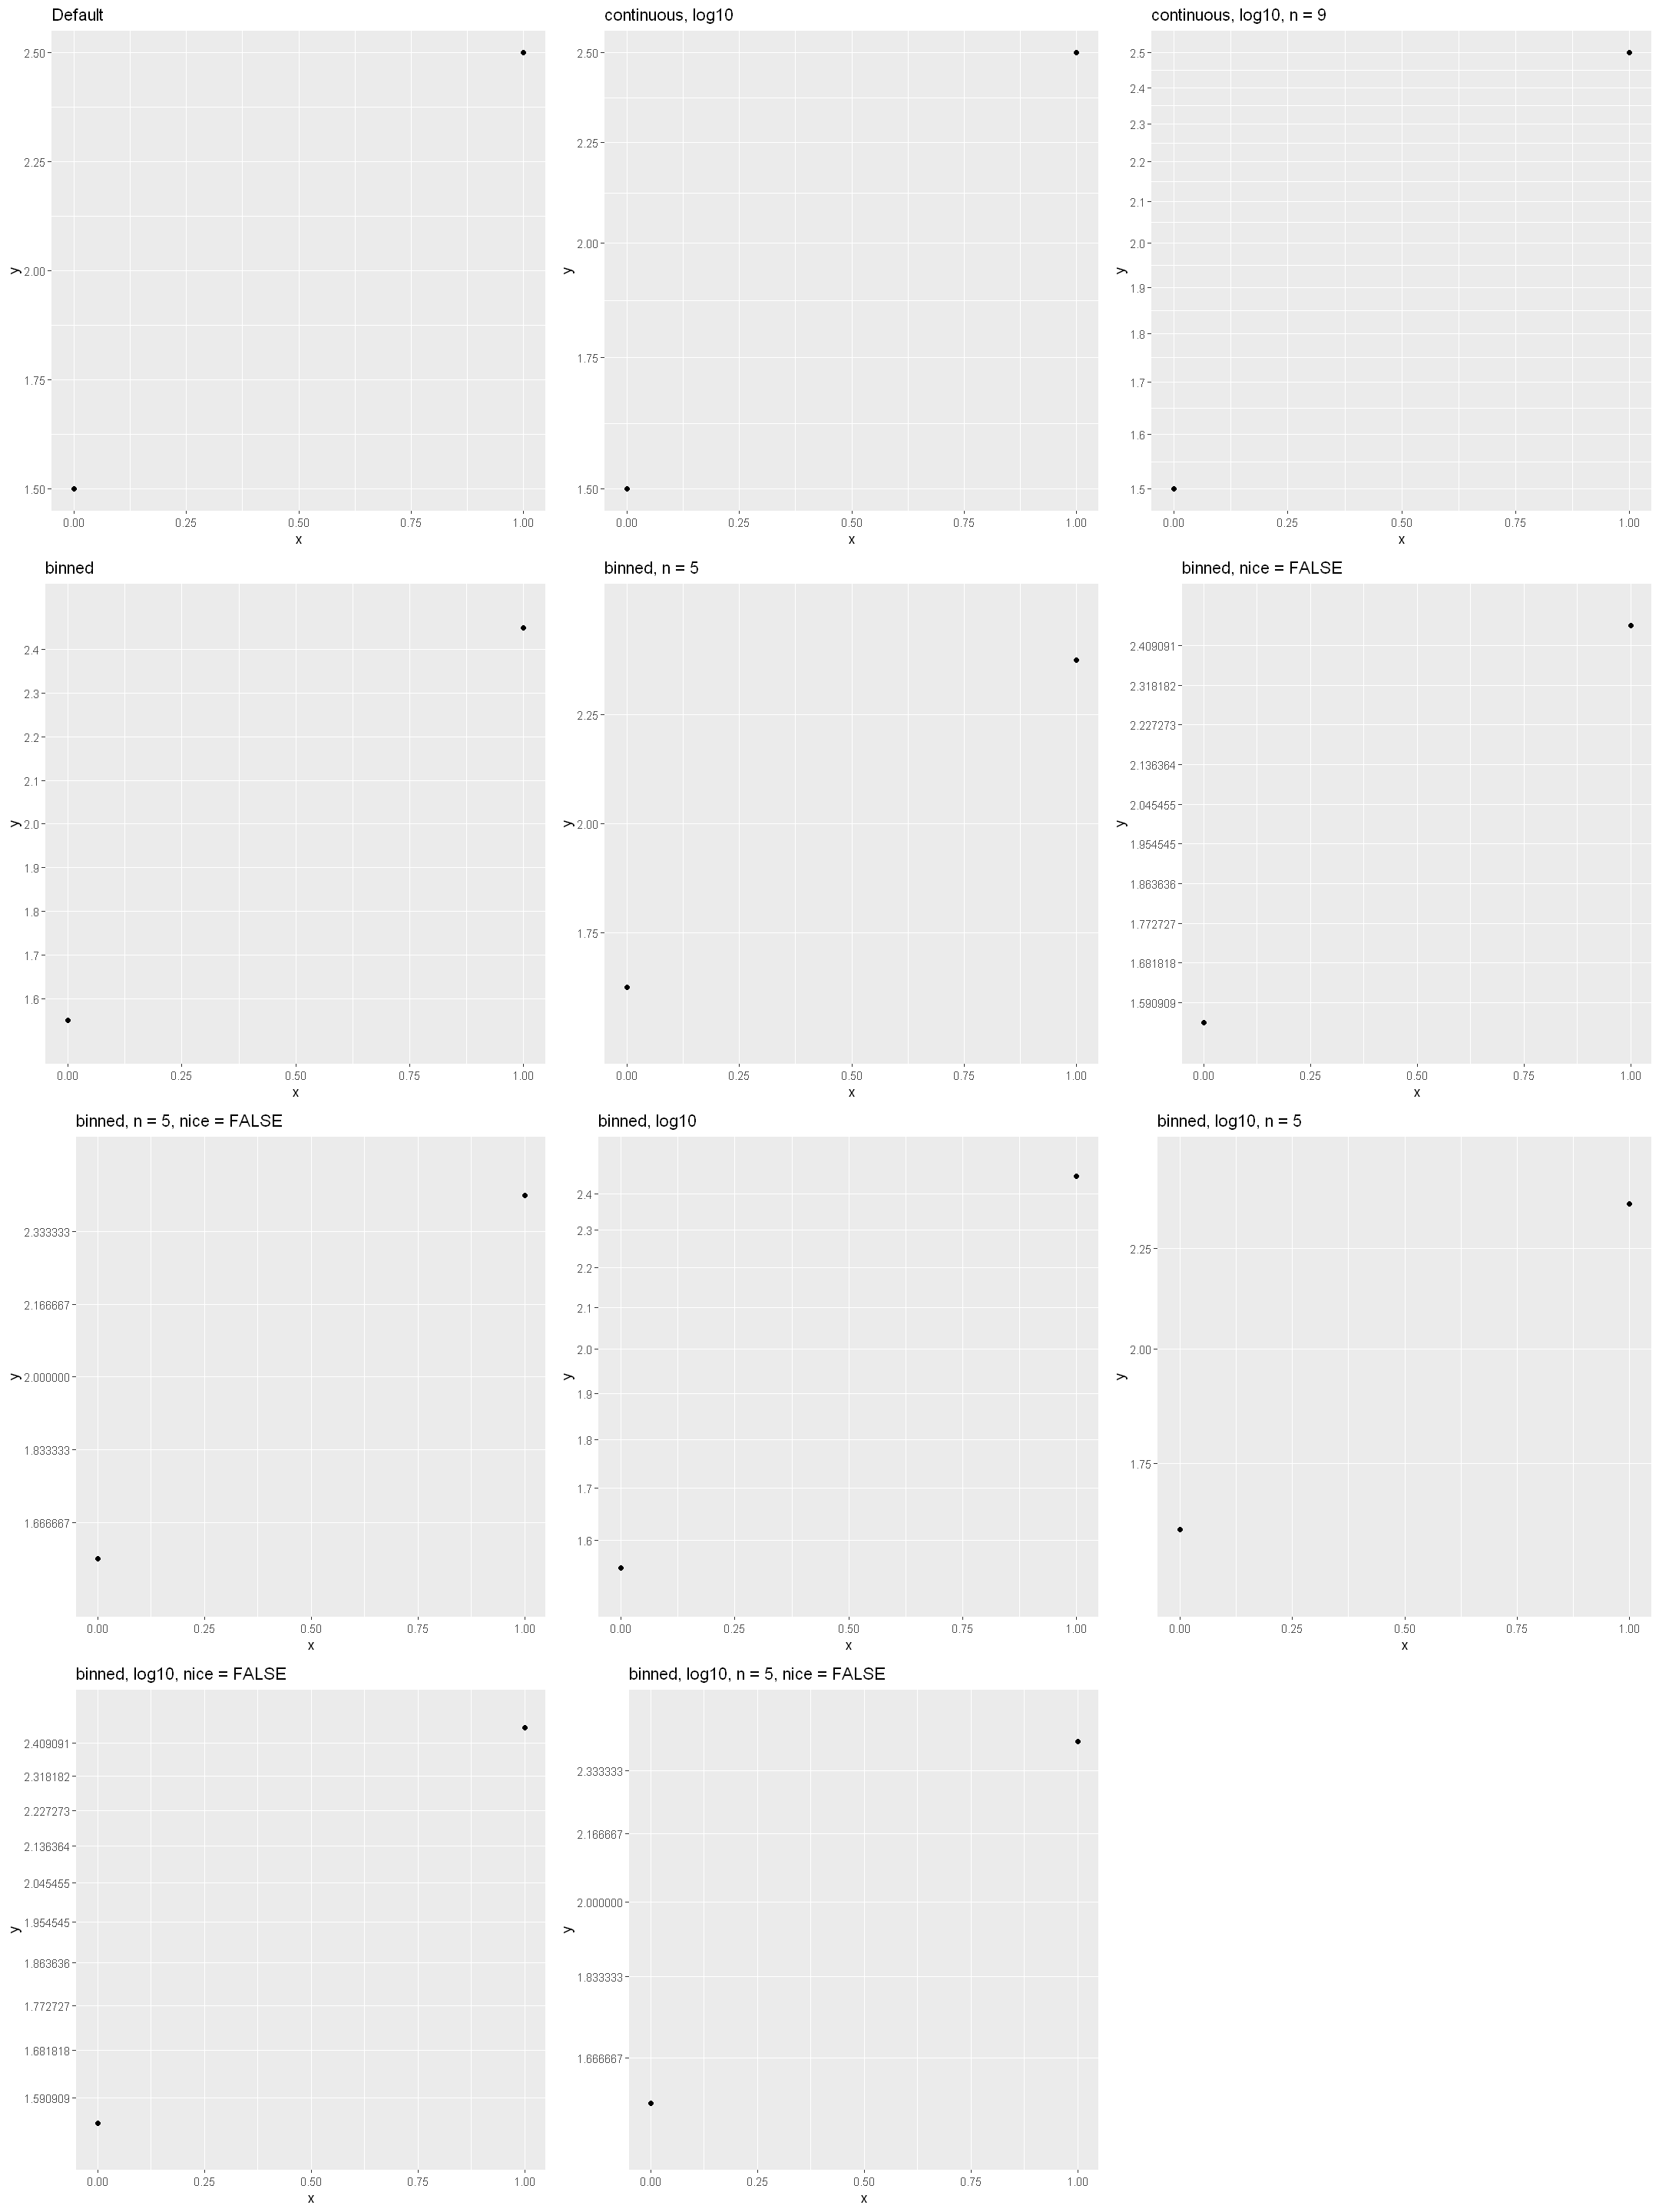

In [10]:
get_plots(small_df, 'x', 'y', 'log10')

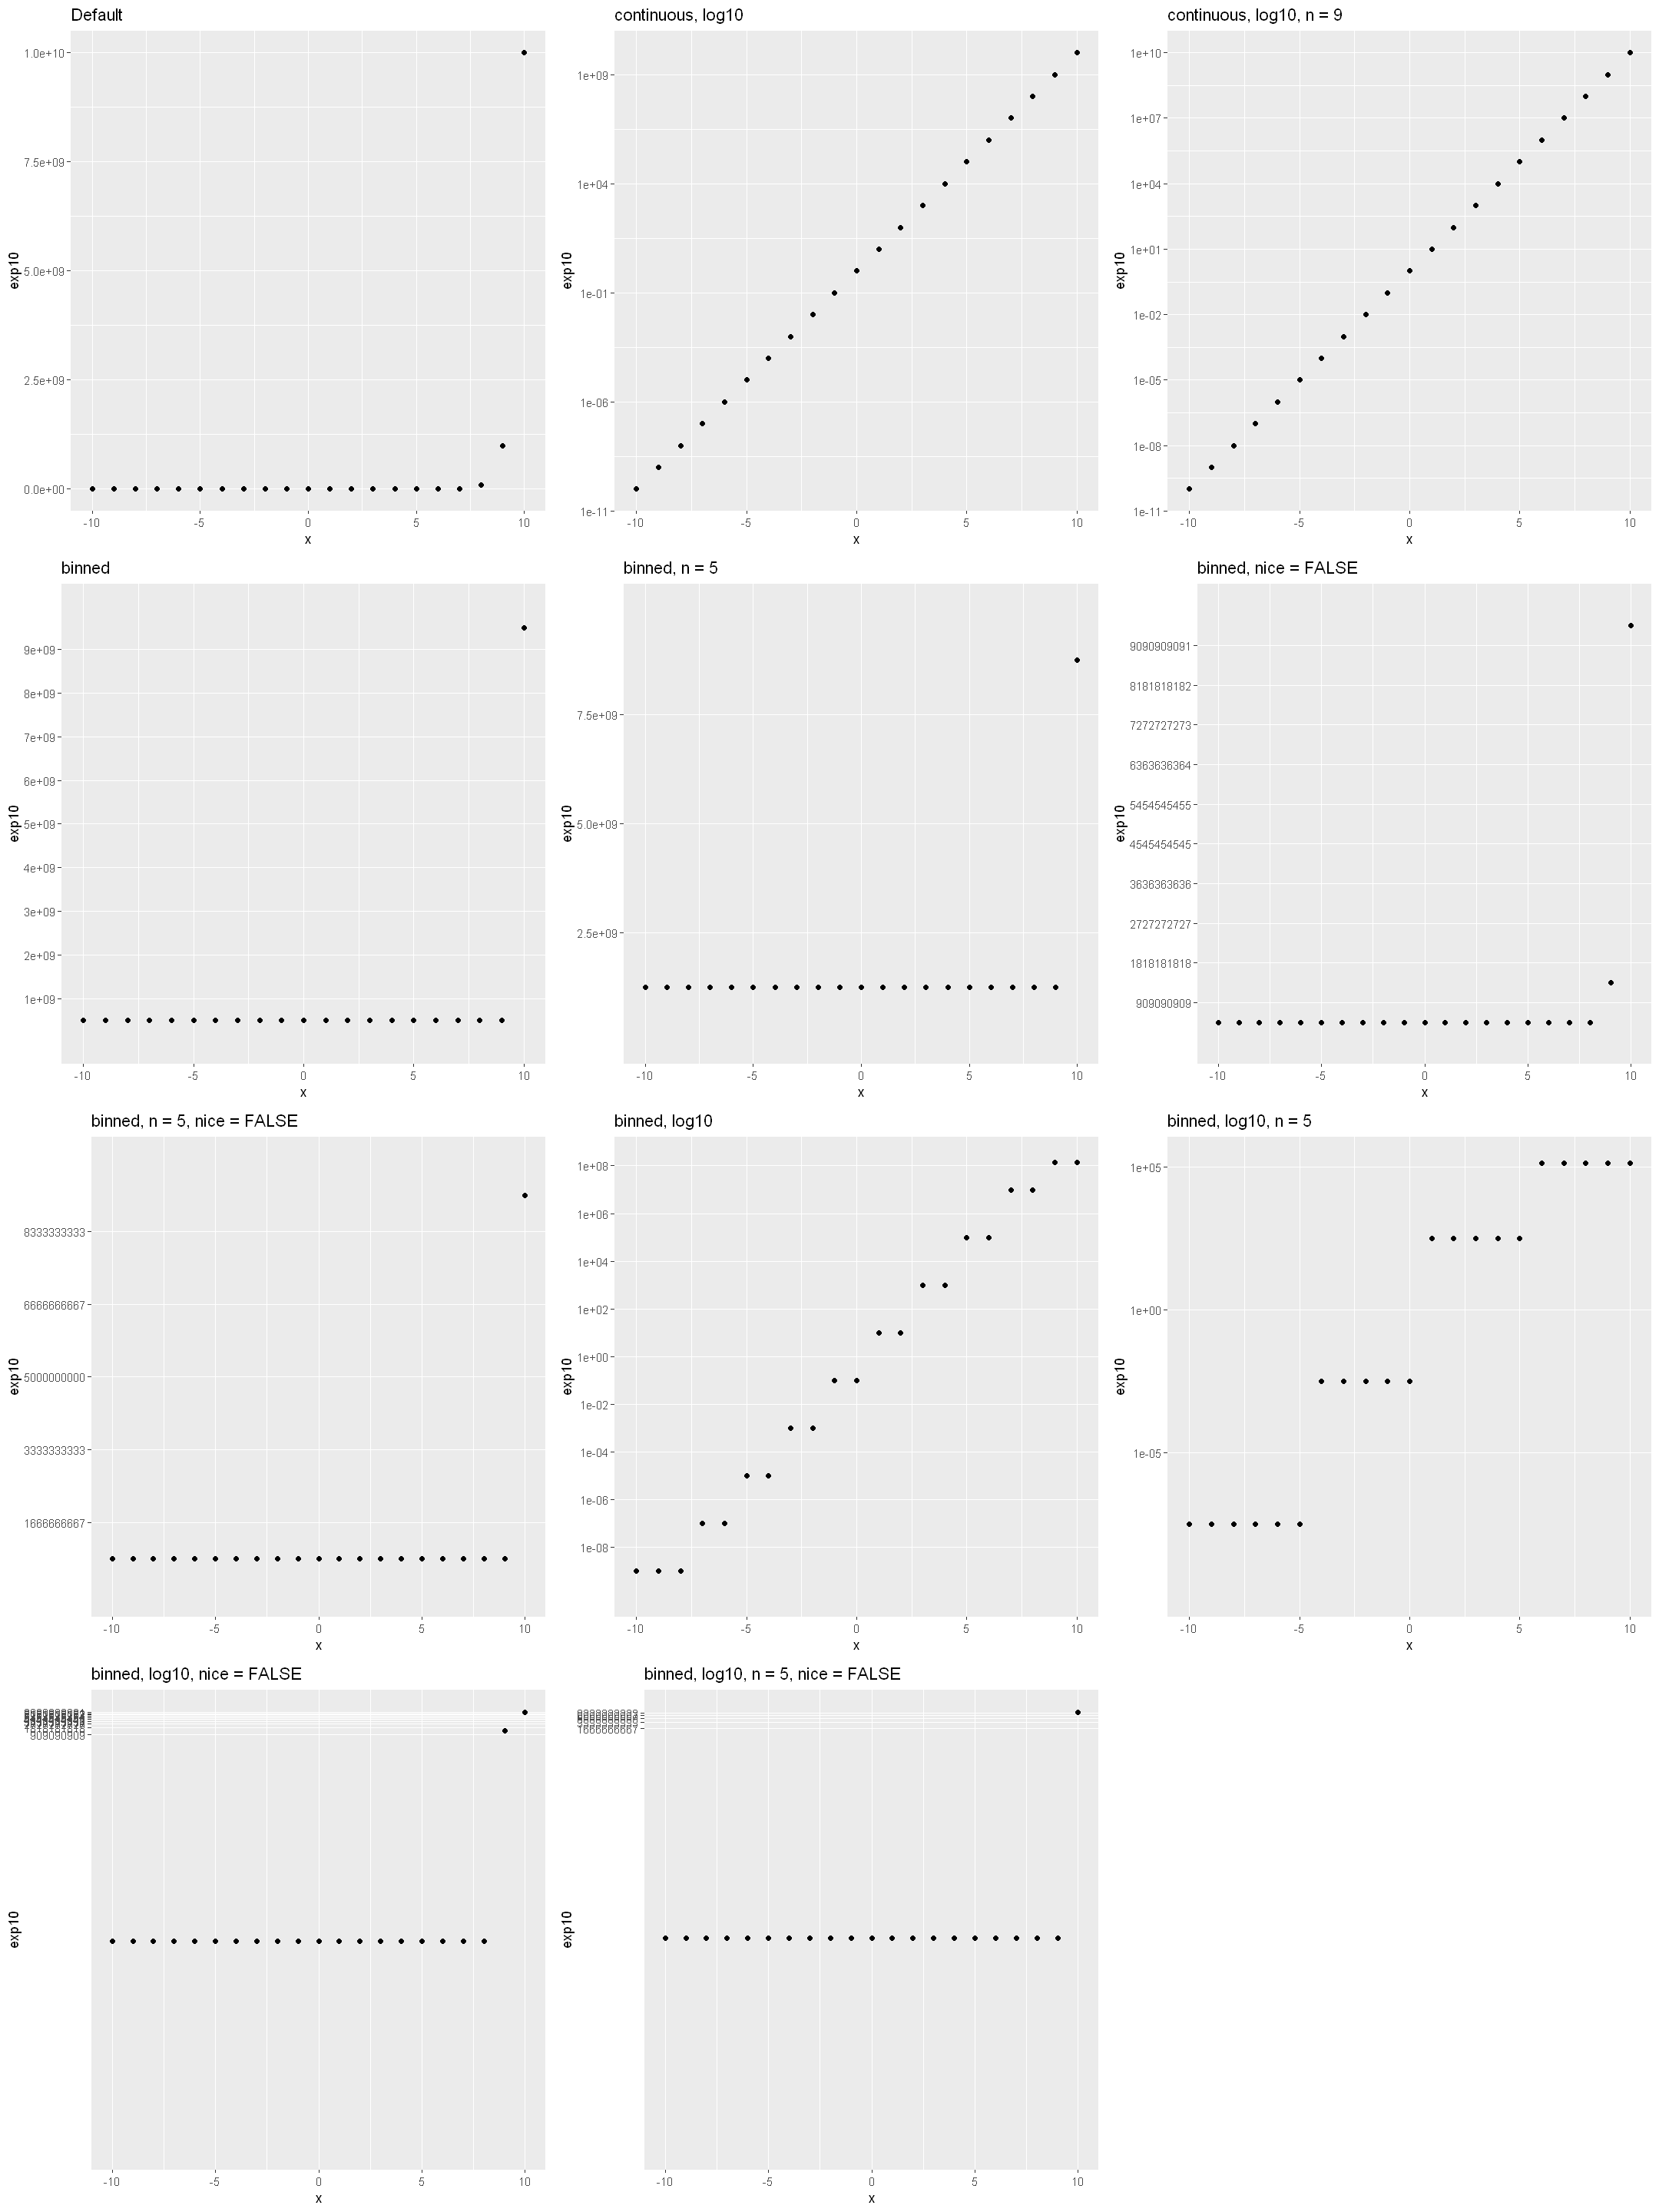

In [11]:
get_plots(df, 'x', 'exp10', 'log10')

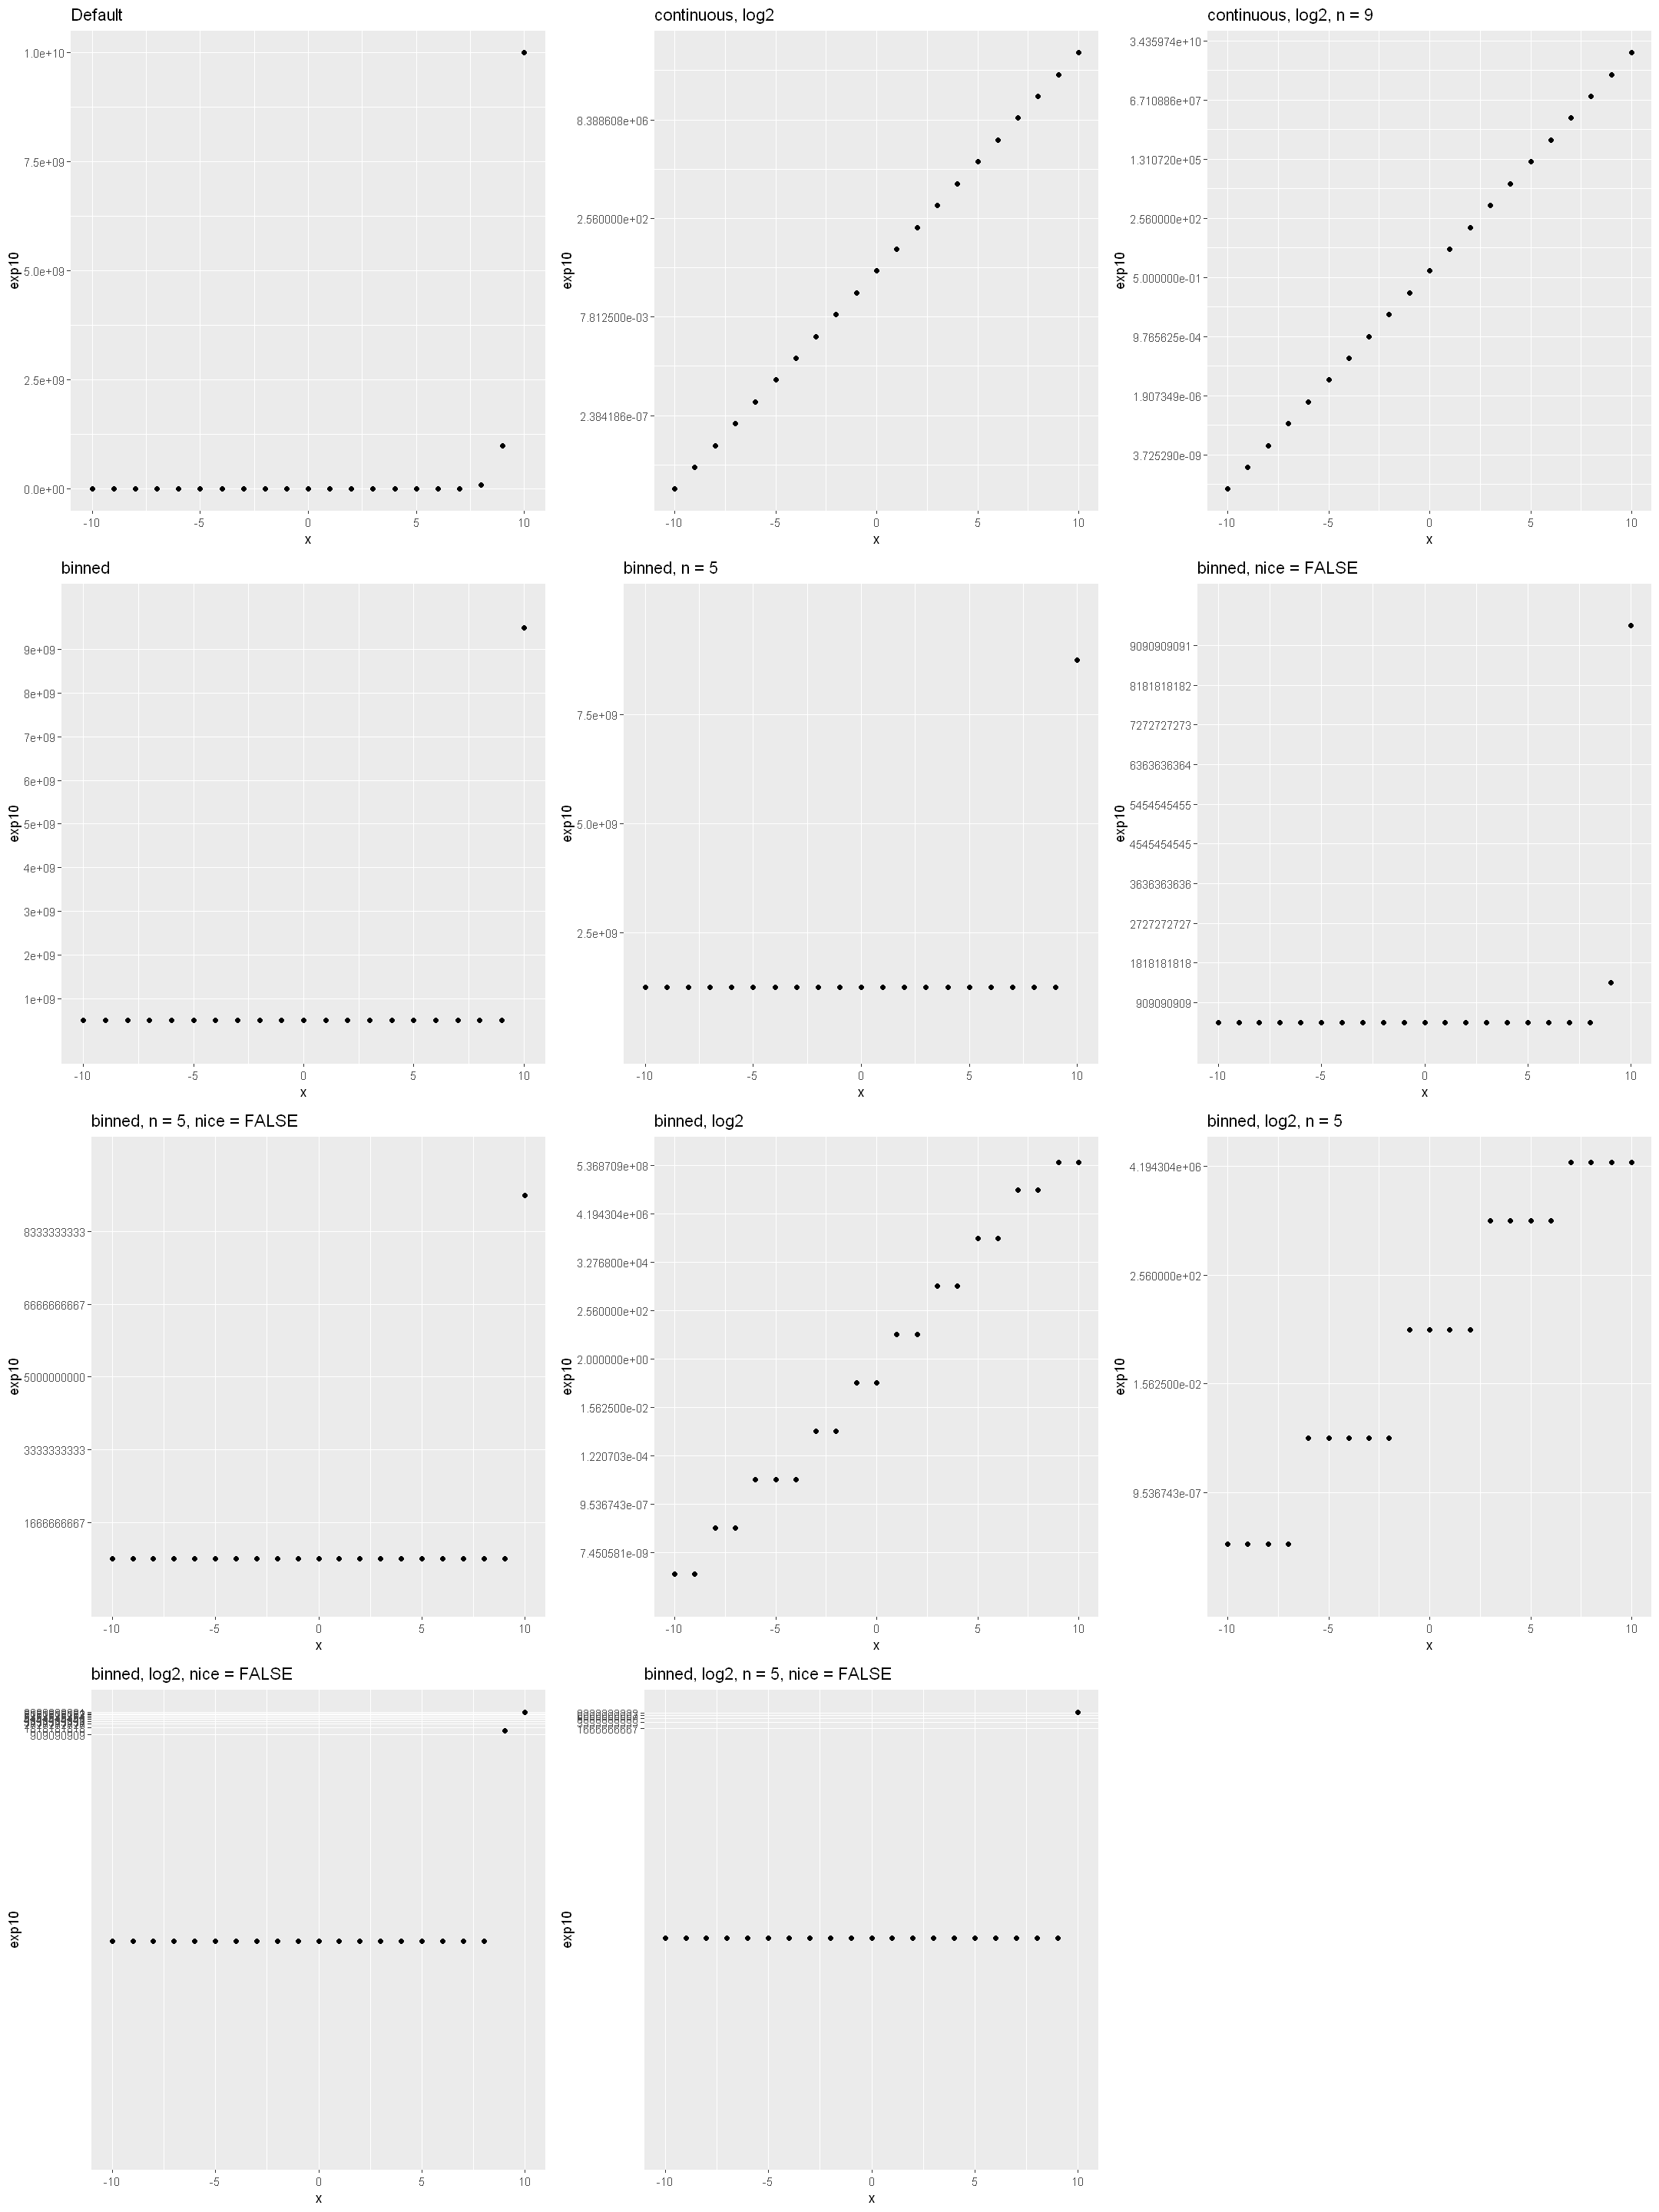

In [12]:
get_plots(df, 'x', 'exp10', 'log2')

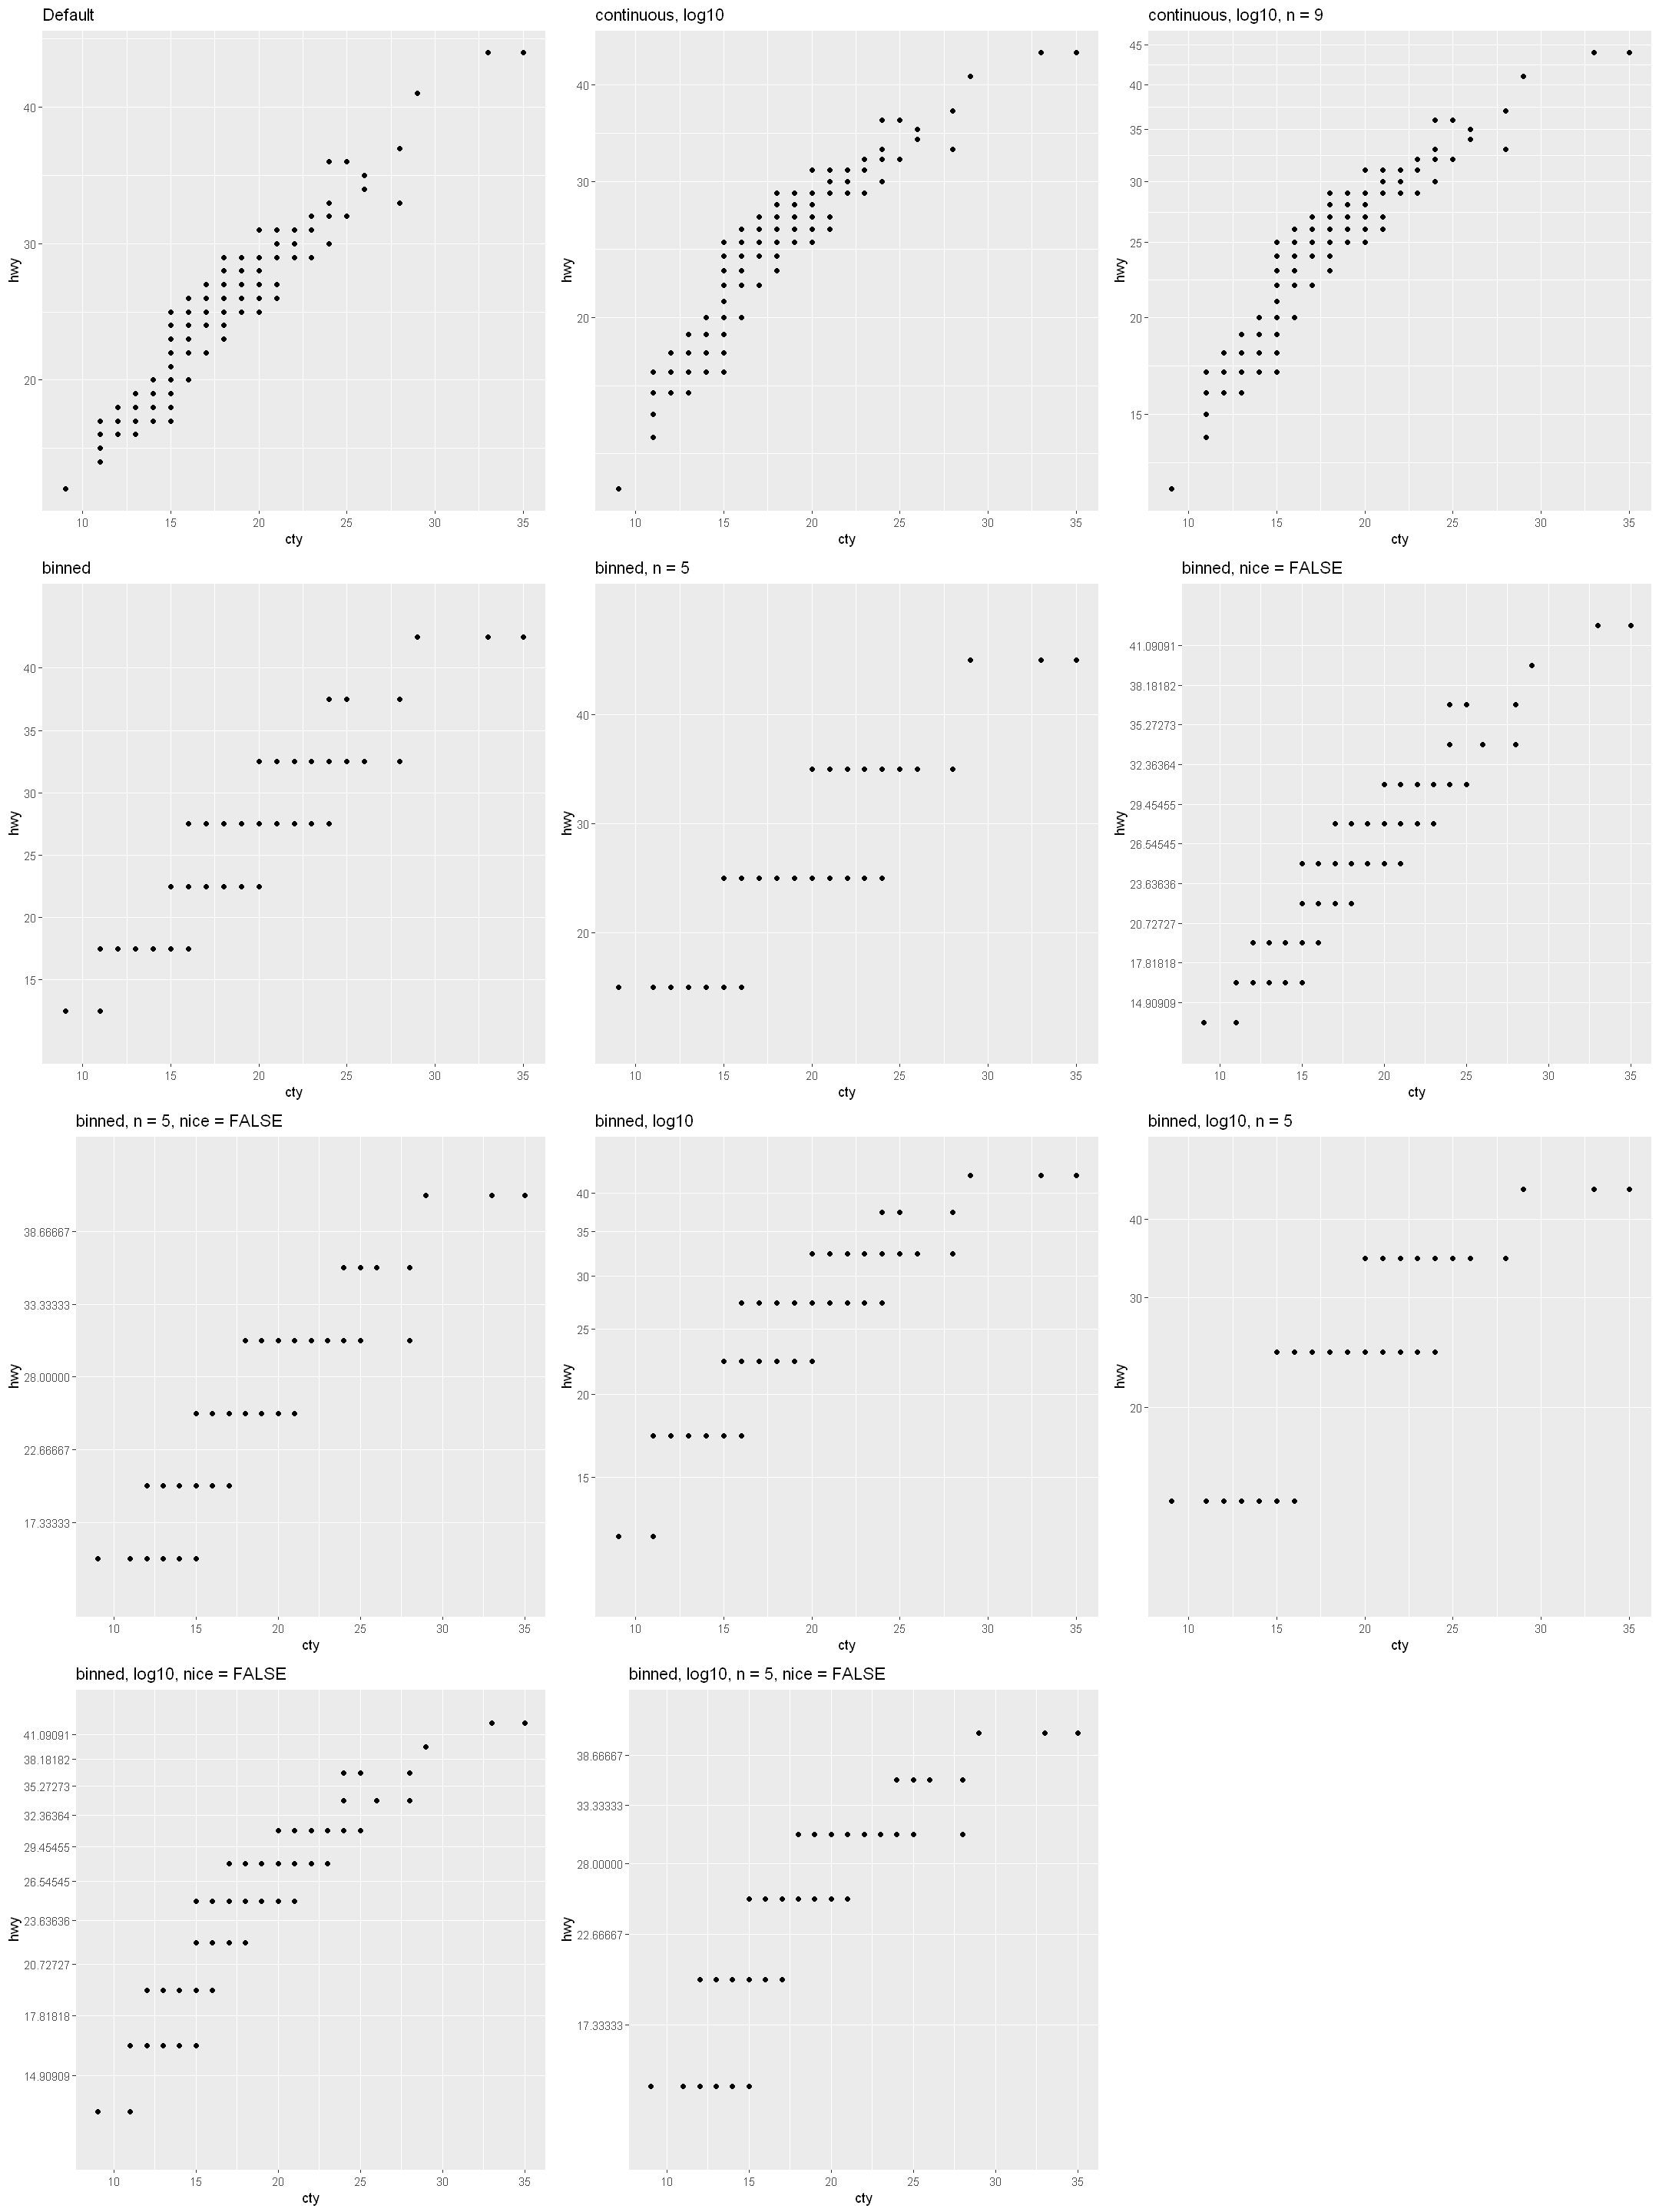

In [13]:
get_plots(mpg, 'cty', 'hwy', 'log10')

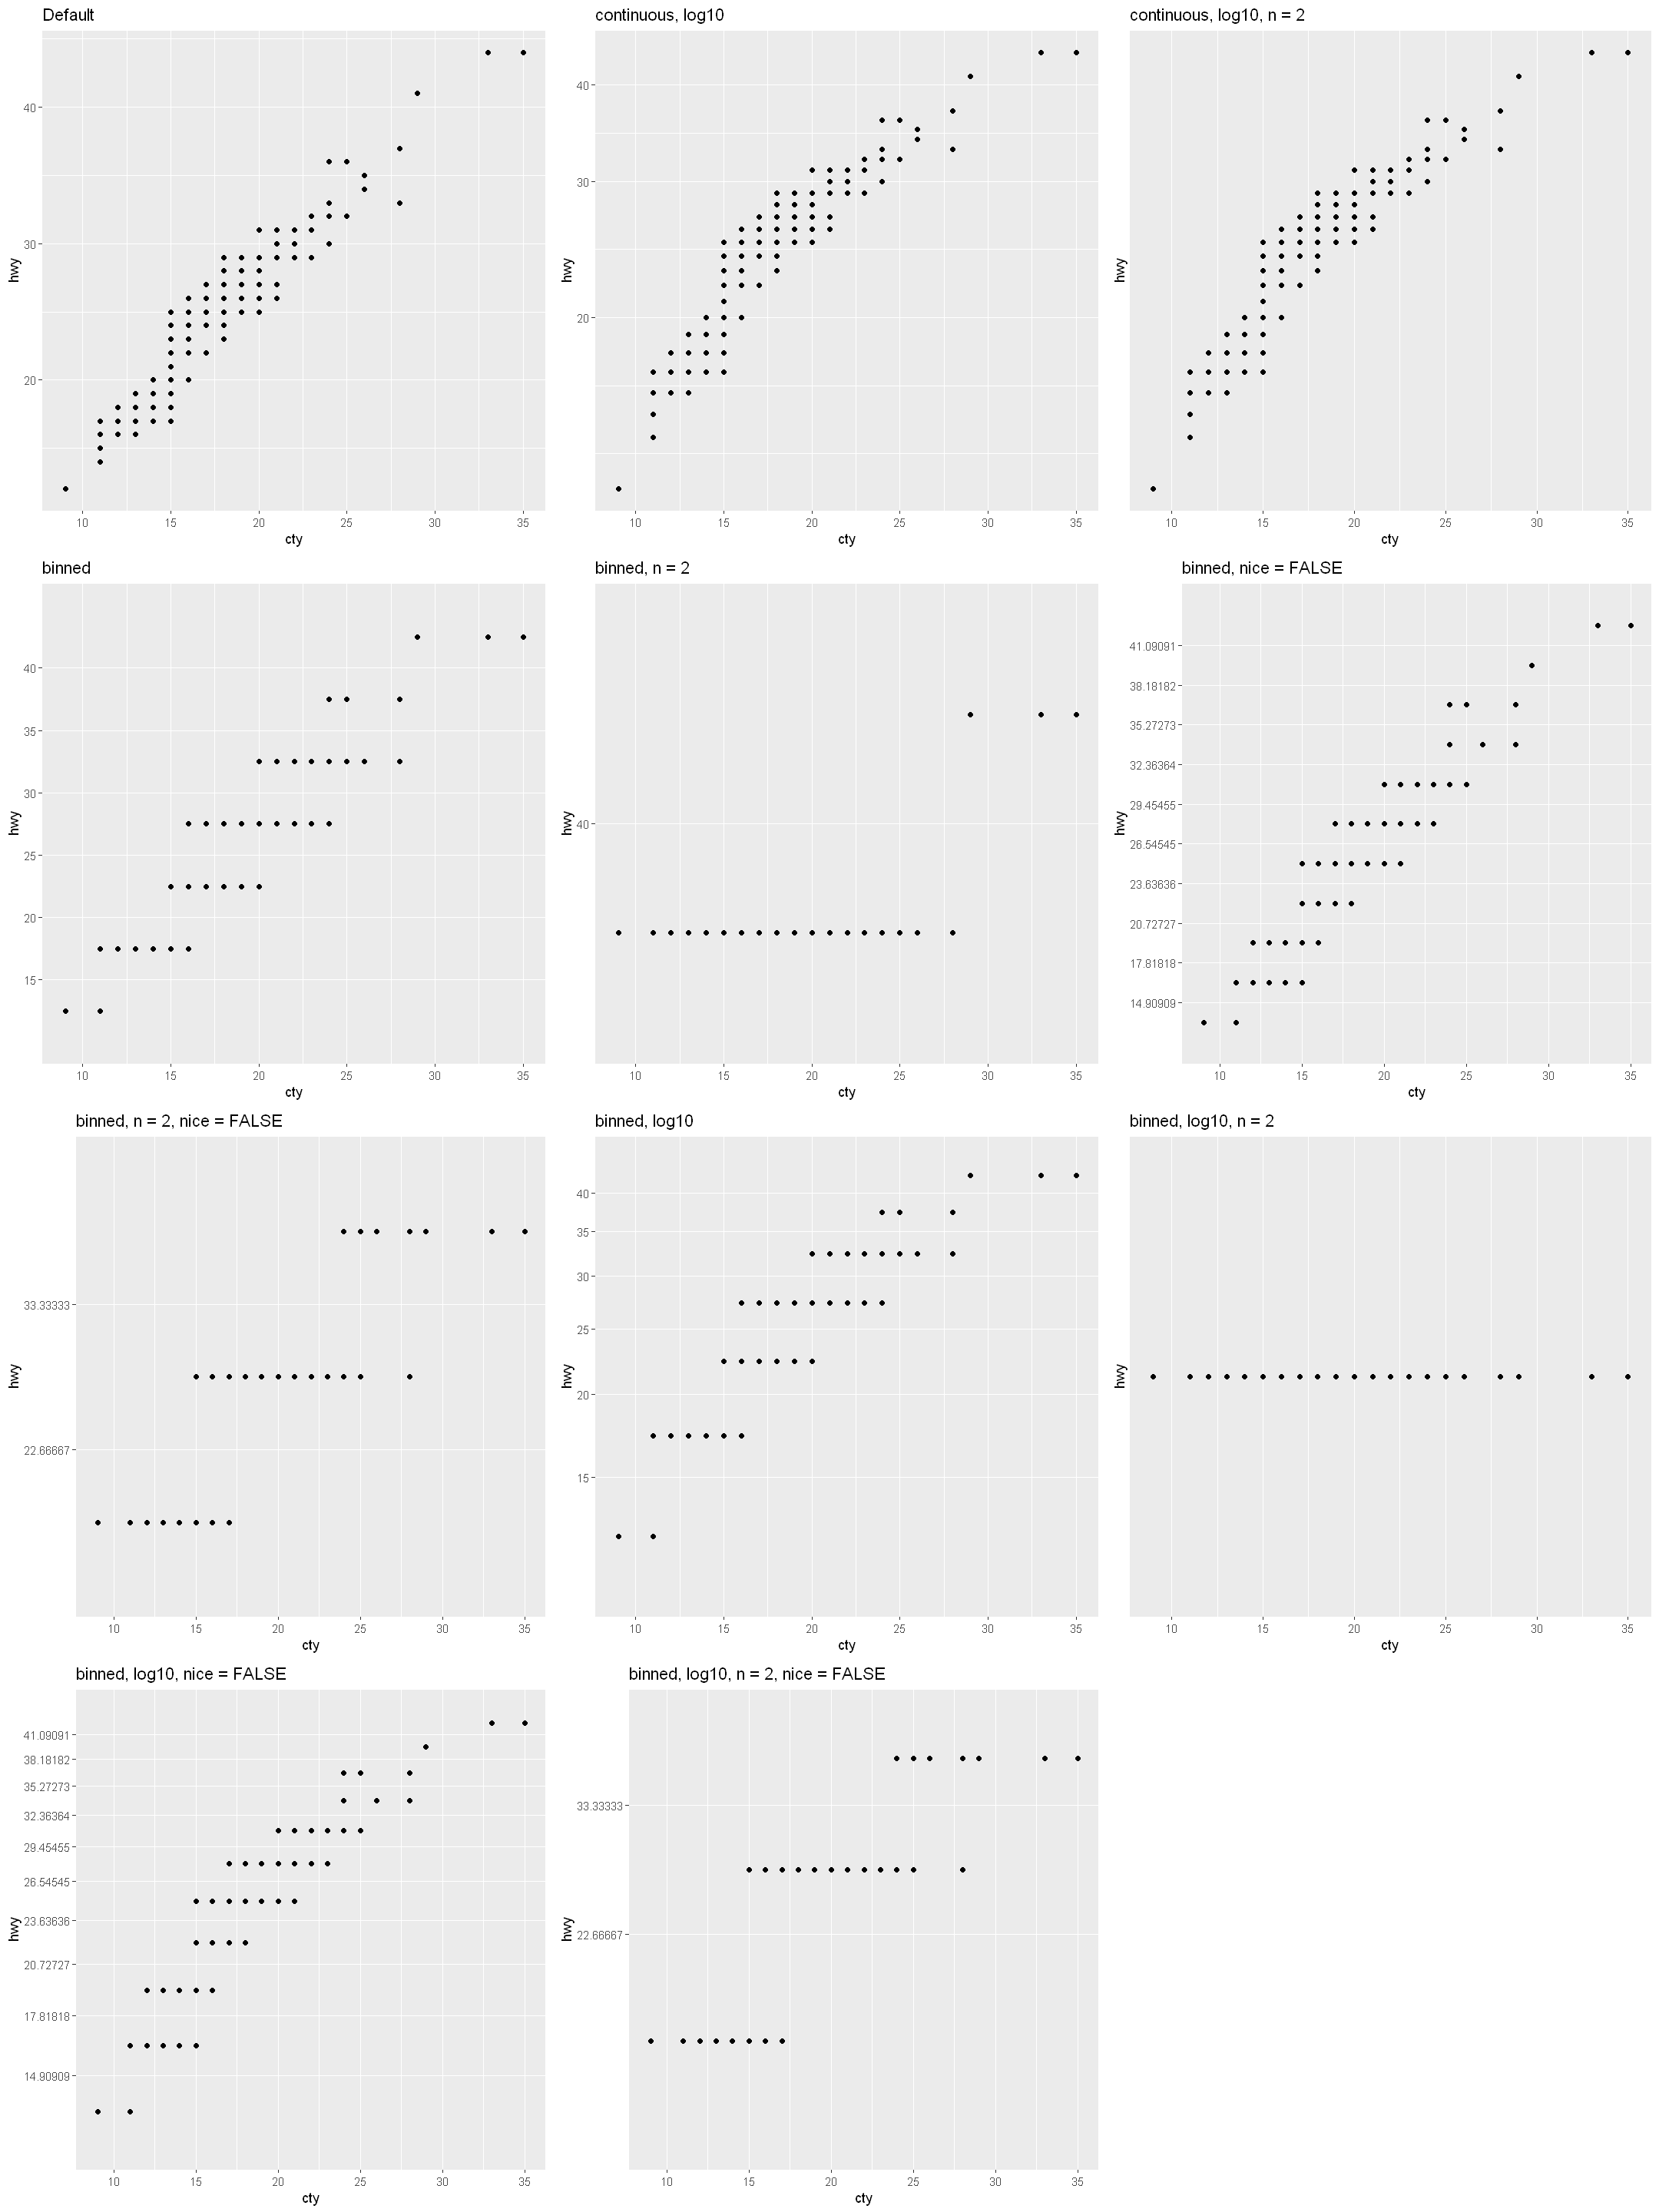

In [14]:
get_plots(mpg, 'cty', 'hwy', 'log10', 2, 2)